Processing ../src/60.txt
Processing ../src/80.txt
Processing ../src/40.txt
Processing ../src/20.txt
Processing ../src/100.txt
Processing ../src/1.txt


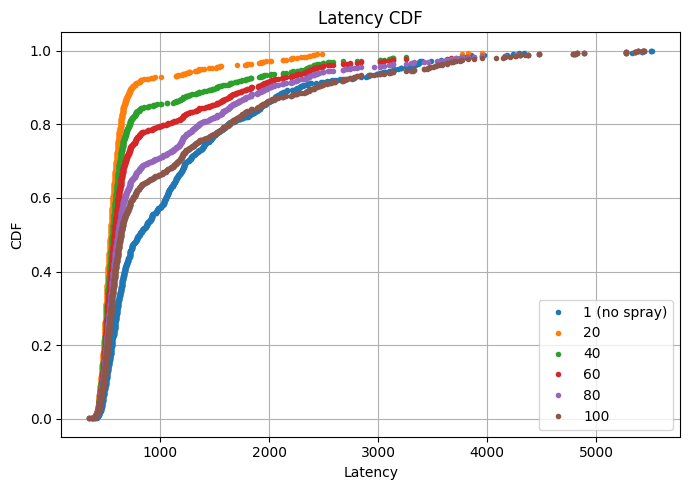

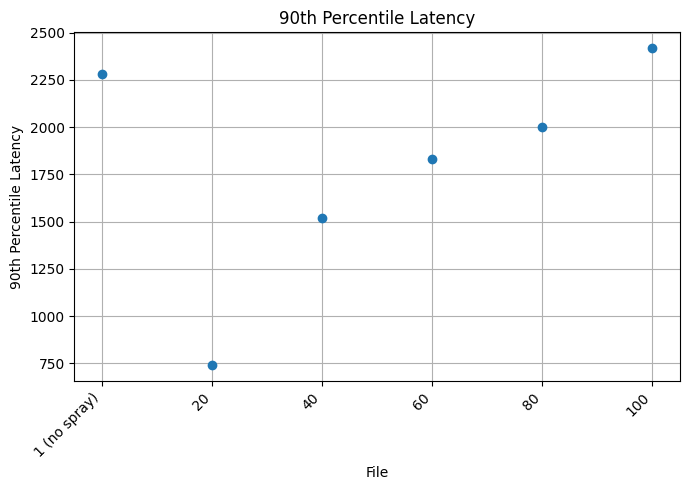

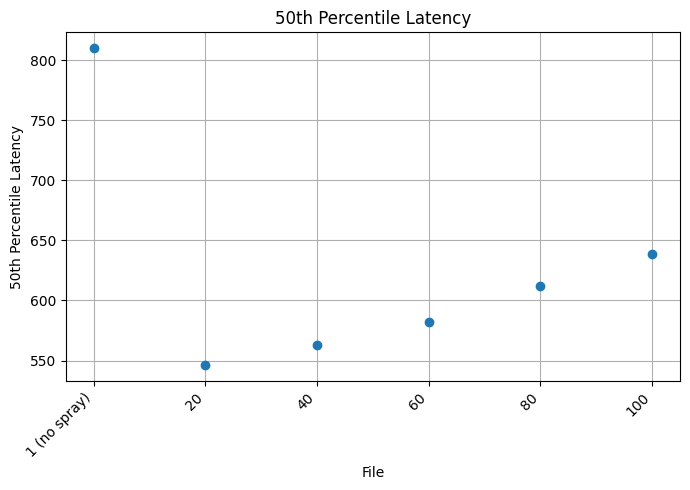

In [16]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os
def extract_latencies(filename):
    latencies = {}
    pattern = re.compile(r"stored (\d+) total latency (\d+)")
    
    with open(filename, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                seq = int(match.group(1))
                lat = int(match.group(2))
                if latencies.get(seq) is None:
                    latencies[seq] = lat
                else:
                    latencies[seq] = max(lat, latencies.get(seq))
                #print(f"seq: {seq}, lat: {lat}, max: {latencies[seq]}")
                    
    
    return latencies

def plot_cdf(data_with_names, title="Latency CDF"):
    """
    data_with_names: dict of (filename, data_array)
    """
    plt.figure(figsize=(7, 5))

    for name, data in data_with_names:
        if name == "1":
            name = "1 (no spray)"
        sorted_data = np.sort(data)
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        plt.plot(sorted_data, cdf, marker='.', linestyle='none', label=name)
        

    plt.xlabel("Latency")
    plt.ylabel("CDF")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig("latency_cdf.png")
    plt.show()

def plot_percentile(percentile, data_with_names):
    """
    data_with_names: list of (filename, data_array)
    """
    labels = [name for name, _ in data_with_names]
    for i in range(len(labels)):
        if labels[i] == "1":
            labels[i] = "1 (no spray)"
    percentiles = [np.percentile(data, percentile) for _, data in data_with_names]

    x = range(len(percentiles))

    plt.figure(figsize=(7, 5))
    plt.plot(x, percentiles, marker='o', linestyle='None')

    plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
    plt.xlabel("File")
    plt.ylabel(f"{percentile}th Percentile Latency")
    plt.title(f"{percentile}th Percentile Latency")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"latency_{percentile}_percentile.png")
    plt.show()

def main():
    # read all files in the current directory
    data = []
    for root, dirs, files in os.walk("../src"):
        for file in files:
            if file.endswith(".txt"):
                filename = os.path.join(root, file)
                print(f"Processing {filename}")
                latencies = extract_latencies(filename)
                if latencies:
                    data.append((file.split(".")[0],list(latencies.values())))
    data = sorted(data, key=lambda x: int(x[0]))
    

    plot_cdf(data)
    plot_percentile(90,data)
    plot_percentile(50,data)

if __name__ == "__main__":
    main()


[67.00269445 63.24671064 64.34400254 ... 51.75491571 51.24476883
 20.73389709]


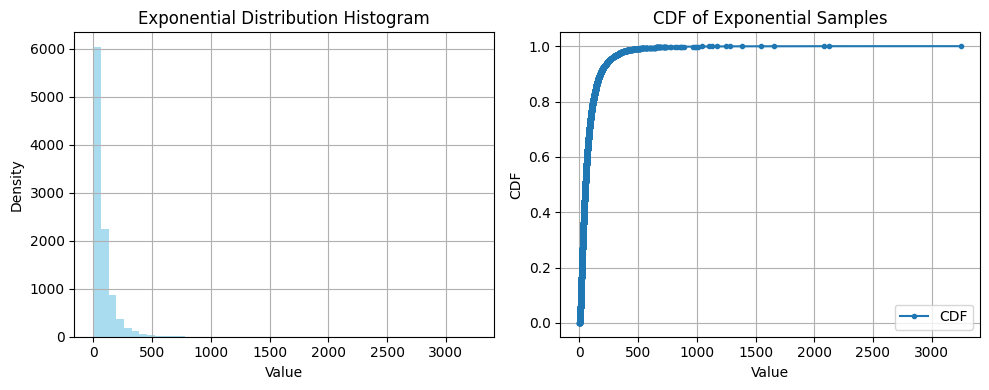

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

expo_scale = np.log(50)
num_samples = 10000
expo_dist = np.random.lognormal(mean=expo_scale, sigma=1, size=num_samples)  
plt.figure(figsize=(10, 4))
print(expo_dist )
plt.subplot(1, 2, 1)
plt.hist(expo_dist, bins=50, alpha=0.7, color='skyblue')
plt.title("Exponential Distribution Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
sorted_data = np.sort(expo_dist)
cdf = np.arange(1, num_samples + 1) / num_samples
plt.plot(sorted_data, cdf, marker='.', linestyle='-', label="CDF")
plt.title("CDF of Exponential Samples")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("exponential_distribution_plots.png")
plt.show()